# npdists package (experimental, unreleased, prototype, untested)

but if you're really curious or want to help with development, this uses the 'multivariate' branch in [github.com/kecnry/npdists](http://github.com/kecnry/npdists) with some documentation at [npdists.readthedocs.io](https://npdists.readthedocs.io/en/latest/).

In [1]:
import numpy as np
import npdists as npd
from phoebe import u

## Uniform / Boxcar

In [2]:
b = npd.uniform(5,10)

In [3]:
b.sample()

9.685472097647796

In [4]:
b.sample(5)

array([5.11882502, 6.25410954, 6.01748893, 9.0628442 , 8.20235371])

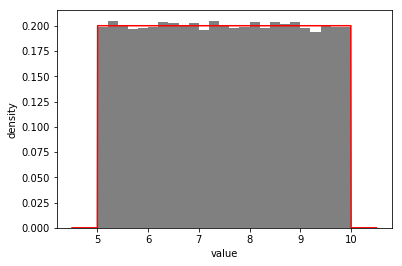

In [5]:
out = b.plot(show=True)

## Gaussian / Normal

In [6]:
g = npd.gaussian(7.5, 2)

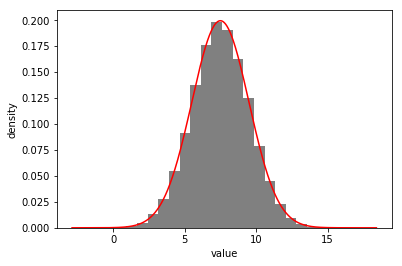

In [7]:
out = g.plot(show=True)

## Accessing log probability for a given sampled value

In [8]:
b.logp(2)

/home/kyle/.local/lib/python2.7/site-packages/npdists-0.1.0.dev0-py2.7.egg/npdists/npdists.py:909: RuntimeWarning: divide by zero encountered in log


-inf

In [9]:
b.logp(7)

-1.6094379124341003

In [10]:
b.logp(8)

-1.6094379124341003

In [11]:
g.logp(6)

-1.893335713764618

In [12]:
g.logp(7)

-1.643335713764618

In [13]:
g.logp(g.sample())

-1.8528499089413273

In [14]:
npd.logp_from_dists((b,g), (5,7))

-3.252773626198718

## Math with distributions

In [28]:
sma = npd.gaussian(6, 1, unit=u.solRad, label='sma')

In [29]:
incl = npd.gaussian(88.5, 2, unit=u.deg, label='incl')

In [30]:
asini = sma * np.sin(incl)

In [36]:
asini.label = 'asini'

In [37]:
asini

<npdists.composite {sma}*sin({incl}) unit=solRad>

In [34]:
print(asini)

{sma}*sin({incl})


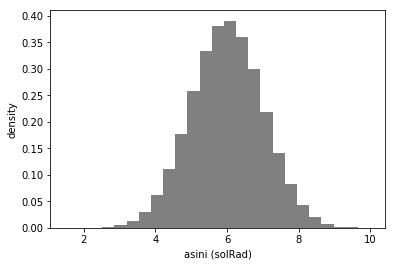

In [33]:
out = asini.plot(show=True)

## Multivariate / Correlated Distributions

In [49]:
mvg = npd.mvgaussian((10,6), np.matrix([[5, 0.8], [0.8, 1.5]]))

In [50]:
mvg

<npdists.mvgaussian locs=(10, 6) cov=[[5.  0.8]
 [0.8 1.5]] dimension=None>

In [51]:
mvg.sample()

array([9.03290279, 4.23028973])

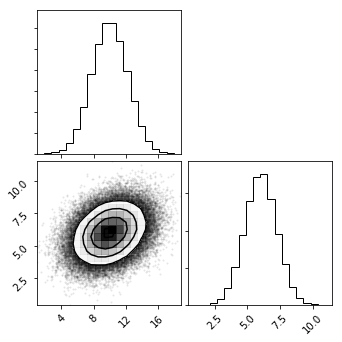

In [52]:
out = mvg.plot(show=True)

## From Posteriors

Can build also build `histogram` and `mvhistogram` distributions from an array of sampled values (i.e. chains from MCMC).  When these are well-behaved, the eventual plan is to be able to convert/fit to analytic distributions... making them smooth and more portable.

The eventual plan is to allow PHOEBE to store the distributions, pass them on to MCMC as either initial distributions and/or priors, and parse the output chains into posteriors.